<a href="https://colab.research.google.com/github/Anushka-999/Global-Air-Pollution-Dataset-Analysis/blob/main/Global_Air_Pollution_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Air Pollution Dataset Analysis**
Contains AQI values of different pollutants for many cities all over the world.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data Cleaning & Preparation

In [4]:
df = pd.read_csv('global air pollution dataset.csv')
df.columns = [c.strip() for c in df.columns]
df['Country'] = df['Country'].fillna('Unknown')

In [5]:
def save_df(df_out, name):
    df_out.to_csv(f'{name}.csv', index=False)
    print(f"Saved {name}.csv")

Exploratory Data Analysis (EDA)

In [8]:
# Overall AQI stats
overall_stats = df['AQI Value'].describe().to_frame().T
save_df(overall_stats, 'overall_aqi_stats')

Saved overall_aqi_stats.csv


In [9]:
# AQI category distribution
aqi_cat_counts = df['AQI Category'].value_counts().rename_axis('AQI Category').reset_index(name='Count')
save_df(aqi_cat_counts, 'aqi_category_distribution')


Saved aqi_category_distribution.csv


In [10]:
# Country-level aggregations
country_agg = df.groupby('Country').agg(
    n_cities=('City','nunique'),
    n_records=('City','count'),
    mean_AQI=('AQI Value','mean'),
    median_AQI=('AQI Value','median'),
    max_AQI=('AQI Value','max'),
    min_AQI=('AQI Value','min'),
    pct_bad_or_worse=('AQI Category', lambda x: round(100*(x.isin(['Unhealthy','Very Unhealthy','Hazardous']).sum()/len(x)),2))
).reset_index()
save_df(country_agg.sort_values('mean_AQI', ascending=False).head(50), 'country_agg_top50_by_mean')


Saved country_agg_top50_by_mean.csv


Plotting

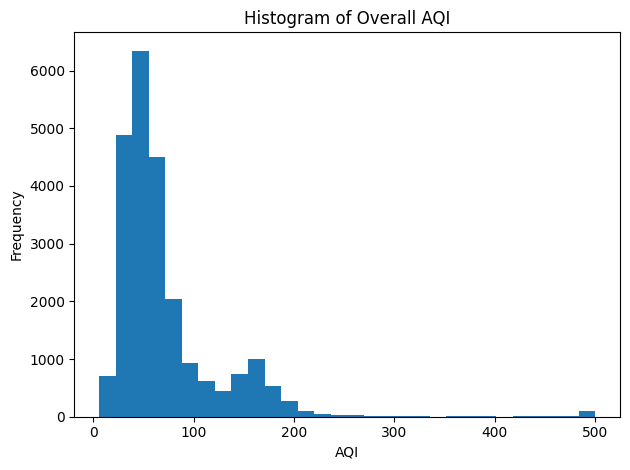

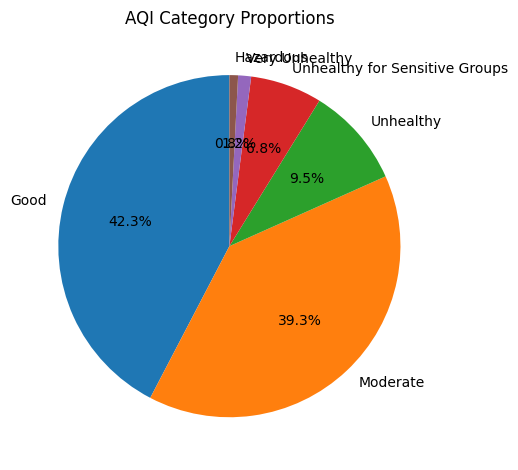

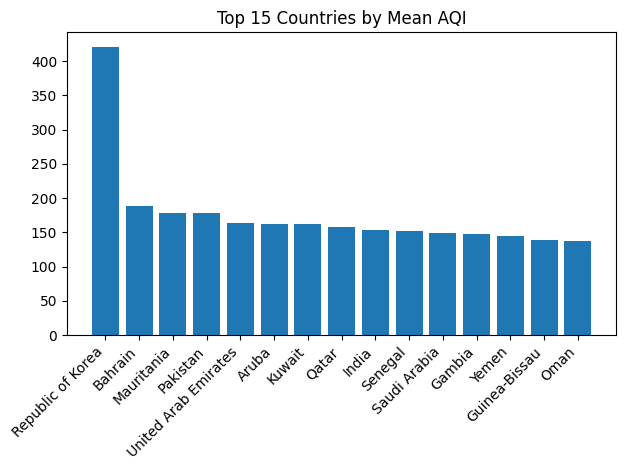

In [12]:
# Plots - histogram, pie chart, top-country bar
plt.figure(); plt.hist(df['AQI Value'], bins=30); plt.title('Histogram of Overall AQI'); plt.xlabel('AQI'); plt.ylabel('Frequency'); plt.tight_layout(); plt.show()
plt.figure(); plt.pie(aqi_cat_counts['Count'], labels=aqi_cat_counts['AQI Category'], autopct='%1.1f%%', startangle=90); plt.title('AQI Category Proportions'); plt.tight_layout(); plt.show()

top15_mean = country_agg.sort_values('mean_AQI', ascending=False).head(15)
plt.figure(); plt.bar(top15_mean['Country'], top15_mean['mean_AQI']); plt.title('Top 15 Countries by Mean AQI'); plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

In [17]:
# Pollutant-by-pollutant loop, plus save CSVs for Power BI import
pollutants = [
    ('CO AQI Value', 'CO AQI Category', 'CO'),
    ('Ozone AQI Value', 'Ozone AQI Category', 'Ozone'),
    ('NO2 AQI Value', 'NO2 AQI Category', 'NO2'),
    ('PM2.5 AQI Value', 'PM2.5 AQI Category', 'PM2.5')
]

for val_col, cat_col, short_name in pollutants:
    # Summary & save
    summary = df[[val_col]].describe().T
    save_df(summary.reset_index().rename(columns={'index':'metric'}), f'{short_name}_summary')


Saved CO_summary.csv
Saved CO_top_countries_by_mean.csv
Saved CO_top_cities.csv
Saved Ozone_summary.csv
Saved Ozone_top_countries_by_mean.csv
Saved Ozone_top_cities.csv
Saved NO2_summary.csv
Saved NO2_top_countries_by_mean.csv
Saved NO2_top_cities.csv
Saved PM2.5_summary.csv
Saved PM2.5_top_countries_by_mean.csv
Saved PM2.5_top_cities.csv


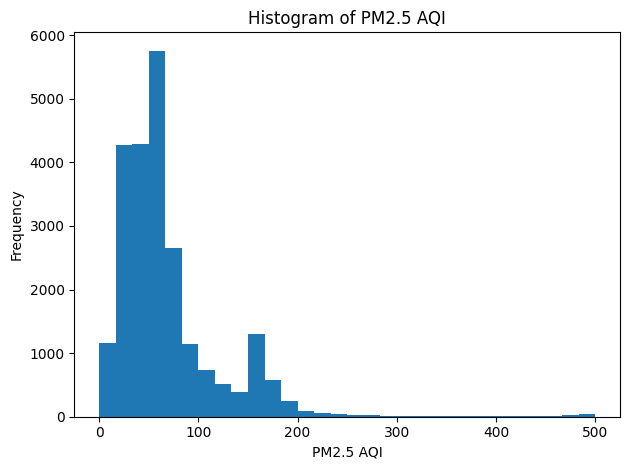

In [22]:
# Histogram
plt.figure();
plt.hist(df[val_col], bins=30);
plt.title(f'Histogram of {short_name} AQI');
plt.xlabel(short_name + ' AQI');
plt.ylabel('Frequency');
plt.tight_layout();
plt.show();


Saved PM2.5_category_counts_top8.csv


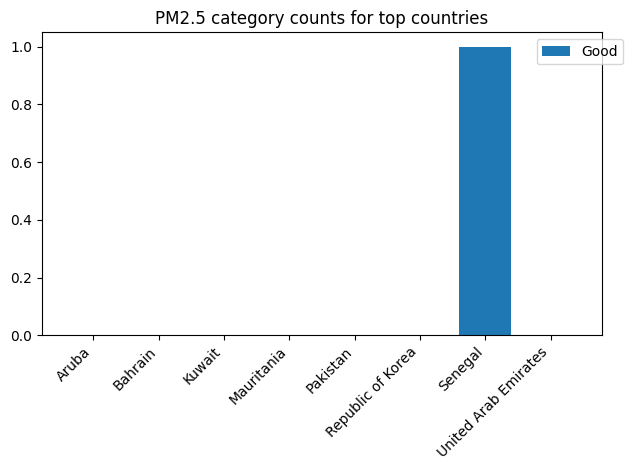

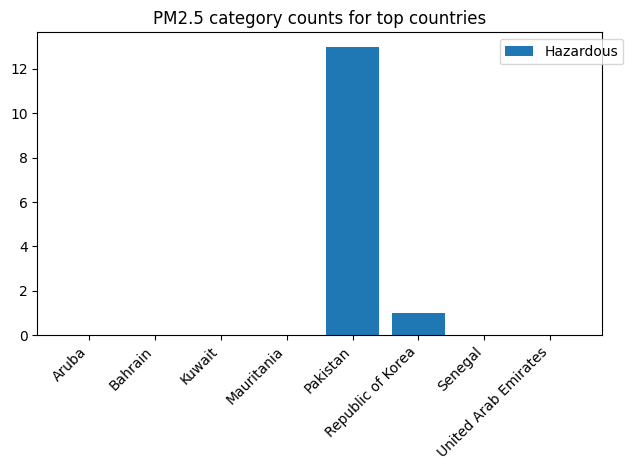

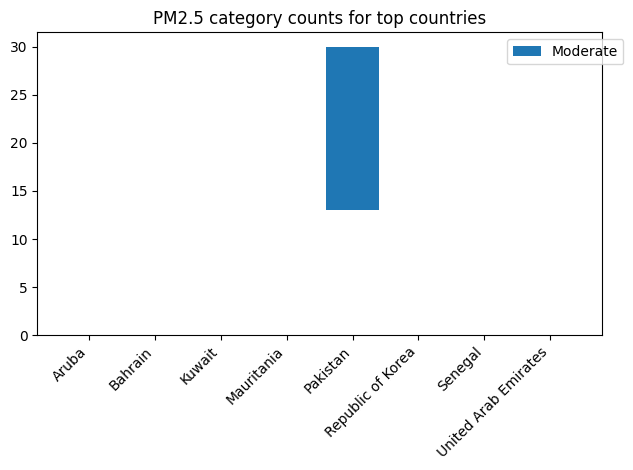

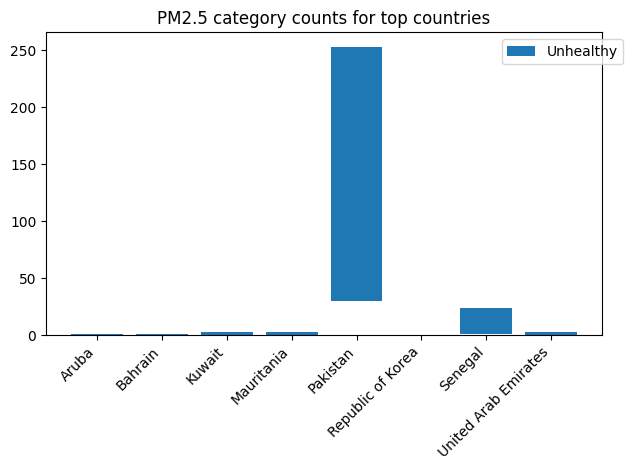

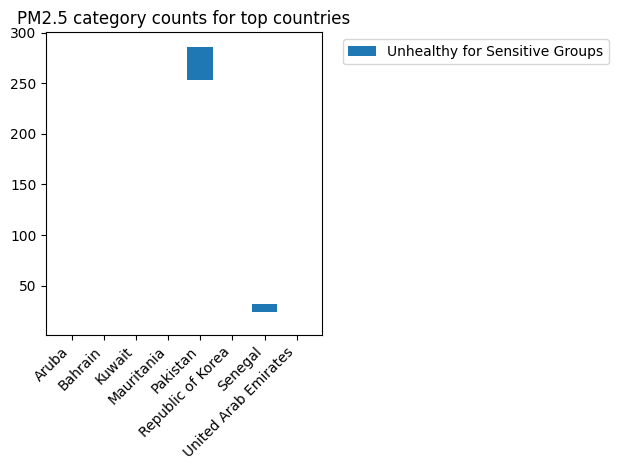

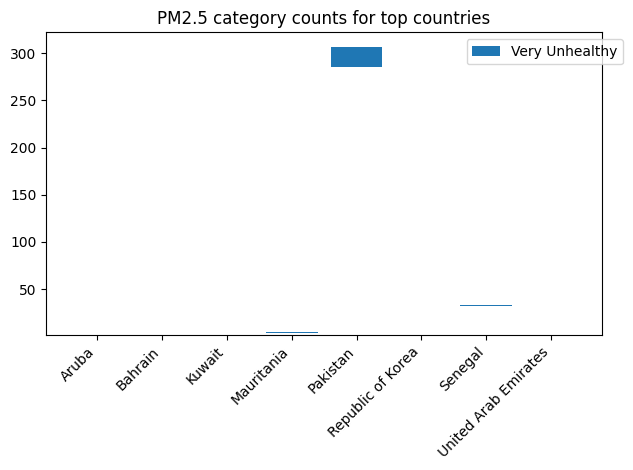

In [24]:
# Stacked counts for top countries
top_countries = p_country.sort_values('mean_val', ascending=False).head(8)['Country'].tolist()
pivot = df[df['Country'].isin(top_countries)].pivot_table(index='Country', columns=cat_col, values=val_col, aggfunc='count').fillna(0)
save_df(pivot.reset_index().rename_axis(None, axis=1), f'{short_name}_category_counts_top8')

# Plot stacked
plt.figure()
bottom = np.zeros(len(pivot))
x = np.arange(len(pivot))
for col in pivot.columns:
  plt.bar(x, pivot[col], bottom=bottom, label=col)
  bottom += pivot[col].values
  plt.title(f'{short_name} category counts for top countries'); plt.xticks(x, pivot.index, rotation=45, ha='right'); plt.legend(bbox_to_anchor=(1.05,1)); plt.tight_layout(); plt.show()

In [27]:
# PM2.5 dataset
pm25_df = df[['Country', 'City', 'PM2.5 AQI Value', 'PM2.5 AQI Category']].dropna()
pm25_df.to_csv("PM25_dataset.csv", index=False)

# CO dataset
co_df = df[['Country', 'City', 'CO AQI Value', 'CO AQI Category']].dropna()
co_df.to_csv("CO_dataset.csv", index=False)

# Ozone dataset
ozone_df = df[['Country', 'City', 'Ozone AQI Value', 'Ozone AQI Category']].dropna()
ozone_df.to_csv("Ozone_dataset.csv", index=False)

# NO2 dataset
no2_df = df[['Country', 'City', 'NO2 AQI Value', 'NO2 AQI Category']].dropna()
no2_df.to_csv("NO2_dataset.csv", index=False)
